# Домашнее задание (10 баллов)

1. (2 балла) Закончить реализацию `ClassificationDecisionTree` в decision_tree (реализовать feature_importance_, проверить корректность predict) и `RandomForestClassifier` в random_forest (predict/predict_proba). Обратите внимение, что в random_forest в качестве `base_estimator` предполагается использовать `DecisionTreeClassifier` из sklearn, использовать вашу реализацию решающего дерева необязательно. <br> Запуск тестов 
- `python -m unittest discover sem_dt_rf/decision_tree/tests`
- `python -m unittest discover sem_dt_rf/random_forest/tests`
 

In [1]:
!python3 -m unittest discover sem_dt_rf/decision_tree/tests
!python3 -m unittest discover sem_dt_rf/random_forest/tests

/home/bogdan/aimasters/ml/sem_dt_rf/decision_tree/criterio.py:84: RuntimeWarning: invalid value encountered in divide
  pred = np.bincount(classes, minlength=self.n_classes) / classes.shape[0]
.../home/bogdan/aimasters/ml/sem_dt_rf/decision_tree/criterio.py:69: RuntimeWarning: invalid value encountered in divide
  pred = np.bincount(classes, minlength=self.n_classes) / classes.shape[0]
......
----------------------------------------------------------------------
Ran 9 tests in 0.144s

OK
........
----------------------------------------------------------------------
Ran 8 tests in 0.011s

OK


2. (1 балл) Для регрессионного дерева необходимо использовать такой критерий:
    $$H(R) = \min_c \frac{1}{|R|} \sum_{(x_i, y_i) \in R} (y_i - c)^2$$
    
    Докажите, что минимум H(R) достигается при $c$:

    $$ c = \frac{1}{|R|} \sum_{(x_j, y_j) \in R} y_j$$

Proof:
$$c^{*}=\argmin_c \frac{1}{|R|} \sum_{(x_i, y_i) \in R} (y_i - c)^2$$
Using first order optimality condition:
$$H(R)^{'}_c = 0 \to (\frac{1}{|R|} \sum_{(x_i, y_i) \in R} (y_i - c)^2)^{'}_c = \frac{1}{|R|}\sum_{(x_i, y_i) \in R} 2*(y_i - c) = 0$$
$$\frac{1}{|R|}\sum_{(x_i, y_i) \in R}y_i - \frac{1}{|R|}\sum_{(x_i, y_i) \in R} c = \frac{1}{|R|}\sum_{(x_i, y_i) \in R} y_i - c = 0$$
Hence:
$$c^{*} =  \frac{1}{|R|}\sum_{(x_i, y_i) \in R} y_i$$

3. (3 балла) Реализуйте регрессионное дерево. В качестве критерия необходимо использовать критерий, определённый в пункте 2. В качестве функции выдачи результатов необходимо использовать среднее значение ответов по всем объектам в листе.

    Сгенерируйте однопризнаковую выборку для тестирования дерева и покажите работу дерева на этой выборке (пример см. ниже, можно использовать свою версию). Отобразите на одном графике значения алгоритма и точки. Что меняется при изменении параметра глубины? Сделайте выводы.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# generate example
x_shape = 300
x = np.arange(x_shape) / 100
y = x**3 * np.sin(x**3) + np.random.random(x_shape)

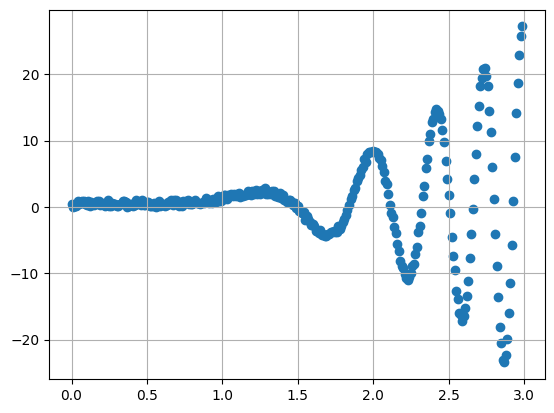

In [3]:
plt.scatter(x, y)
plt.grid()
plt.show()

In [14]:
from sem_dt_rf.decision_tree.decision_tree import RegressionDecisionTree
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/bogdan/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bogdan/.local/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


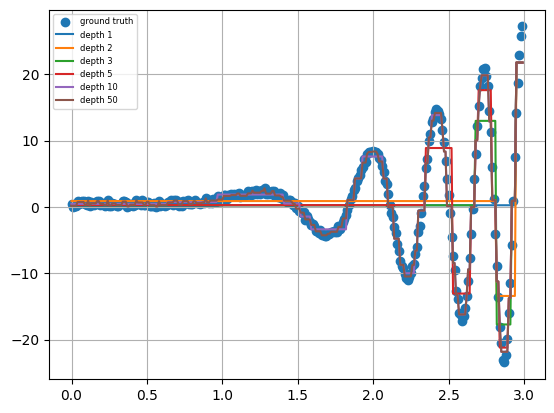

In [21]:
plt.scatter(x, y, label='ground truth')

for depth in [1, 2, 3, 5, 10, 50]:
    tree = RegressionDecisionTree(max_depth=depth)
    tree.fit(x.reshape(-1, 1), y)
    predict = tree.predict(x.reshape(-1, 1))
    plt.plot(x, predict, label=f'depth {depth}')

plt.legend(fontsize=6)
plt.grid()
plt.show()

При увеличении глубины дерева мы видим больше различных "пиков", кривая предсказания становится более ломанной и лучше предсказывает. Но при большой глубине, например в нашем случае 50, происходит переобучение, как видно из предсказаний для точек слева: точки находятся почти на прямой, а предсказания очень зашумлены и скачат вверх и вниз, подстраиваясь под единичные сэмплы.

4. (4 балла) Протестируйте различные реализации `random_forest` на `fetch_covtype` датасете (можно загрузить с помощью `sklearn.datasets.fetch_covtype`). Возможно, поможет ноутбук с семинара `ensembles_seminar.ipynb`. Для честного сравнения старайтесь использовать похожий набор гиперпараметров.
- ваша реализация (import `RandomForestClassifier as MyRandomForestClassifier` ниже)
- sklearn https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- lightgbm https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMModel.html см. параметр `boosting_type`
- xgboost https://xgboost.readthedocs.io/en/stable/tutorials/rf.html

    Что нужно сделать: 
- Разбейте данные на train и test. 
- Оцените качество алгоритмов по метрике (balanced_accuracy_score)[https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html]
- Оцените время работы `train` и `predict`
- Сделайте выводы

In [3]:
import sys
sys.path.extend(['.']) # change your path

In [4]:
from sem_dt_rf.random_forest.random_forest import RandomForestClassifier as MyRandomForestClassifier

In [5]:
from sklearn.datasets import fetch_covtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb

In [6]:
cov_type = fetch_covtype()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(cov_type['data'], cov_type['target'], test_size=0.3, random_state=0)
y_train -= 1
y_test -= 1 

In [8]:
clf = MyRandomForestClassifier(n_estimators=100, max_depth=8, random_state=0, max_objects_samples=0.632)

In [9]:
%%time
clf.fit(x_train, y_train)

CPU times: user 2min 49s, sys: 3.26 s, total: 2min 52s
Wall time: 2min 52s


In [10]:
%%time
pred = clf.predict(x_test)

CPU times: user 18.9 s, sys: 3.43 s, total: 22.4 s
Wall time: 22.5 s


In [11]:
my_score = balanced_accuracy_score(y_test, pred)

In [12]:
clf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0)

In [13]:
%%time
clf.fit(x_train, y_train)

CPU times: user 54.7 s, sys: 70.1 ms, total: 54.8 s
Wall time: 54.8 s


RandomForestClassifier(max_depth=8, random_state=0)

In [14]:
%%time
pred = clf.predict(x_test)

CPU times: user 1.89 s, sys: 10 ms, total: 1.9 s
Wall time: 1.9 s


In [15]:
sklearn_score = balanced_accuracy_score(y_test, pred)

In [16]:
params = {
    'num_leaves': 2 ** 8,
    'min_data_in_leaf': 50,
    'objective': 'multiclass',
    'num_classes': len(np.unique(y_train)),
    'max_depth': 8,
    "boosting": "rf",
    "seed": 0,
    "bagging_frequency": 0.65,
    "subsample": .632,
    "subsample_freq": 1,
    "verbose": -1,
}

In [17]:
data = lgb.Dataset(data=x_train, label=y_train)

In [18]:
%%time
clf = lgb.train(params, train_set=data, num_boost_round=100)

CPU times: user 4min 29s, sys: 2.34 s, total: 4min 31s
Wall time: 36.1 s


In [19]:
%%time
pred = clf.predict(x_test)

CPU times: user 37.9 s, sys: 118 ms, total: 38 s
Wall time: 5.02 s


In [20]:
lgb_score = balanced_accuracy_score(y_test, np.argmax(pred, axis=1))

In [21]:
params = {
    "booster": "gbtree",
    "subsample": .632,
    "max_depth": 8,
    "num_parallel_tree": 100,
    "objective": "multi:softmax",
    "num_class": len(np.unique(y_train)),
    "eta":1,
    "random_state": 0,
    "n_jobs": -1,
}

In [22]:
data = xgb.DMatrix(x_train, label=y_train)
test_data = xgb.DMatrix(x_test)

In [23]:
%%time
clf = xgb.train(params, data, num_boost_round=1)

CPU times: user 6min 42s, sys: 4.11 s, total: 6min 46s
Wall time: 1min


In [24]:
%%time
pred = clf.predict(test_data)

CPU times: user 11.8 s, sys: 59 ms, total: 11.9 s
Wall time: 1.58 s


In [25]:
xgb_score = balanced_accuracy_score(y_test, pred)

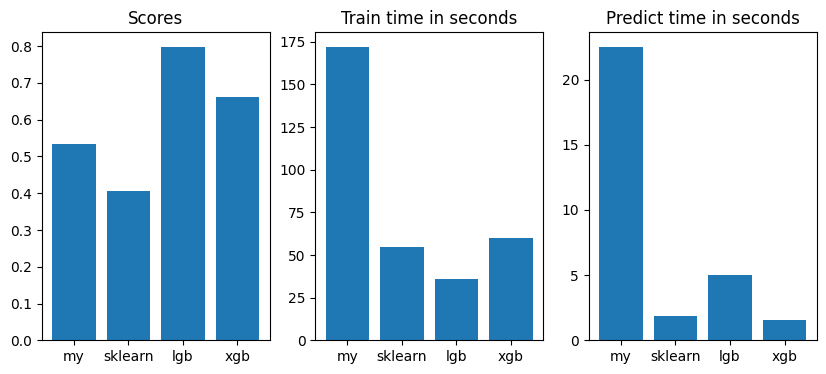

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].bar(x=['my', 'sklearn', 'lgb', 'xgb'], height=[my_score, sklearn_score, lgb_score, xgb_score])
axes[0].set_title('Scores')

axes[1].bar(x=['my', 'sklearn', 'lgb', 'xgb'], height=[172, 54.8, 36.1, 60])
axes[1].set_title('Train time in seconds')

axes[2].bar(x=['my', 'sklearn', 'lgb', 'xgb'], height=[22.5, 1.9, 5.02, 1.58])
axes[2].set_title('Predict time in seconds')

plt.show()

Как видно из графиков, самописная реализация на питоне оказалась самой долгой по обучению и инференсу, что ожидаемо. Правда скор выше чем у склерна, видимо доп настройки реализации в склерне мешают. Обучение у sklearn и xgb занимет похожее количество времени, а lgb немного отрывается от них. Зато при инференсе все наоборот, xgb и sklearn оказались очень быстрыми. Скоры наибольшими оказались у библиотек бустингов - lgbm показал хороший результат с отрывом, за ним xgbm.